In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import numpy as np

from scipy import special, stats, optimize, integrate

from mpmath import *

from code.python.mpmath_integration import quad_phi

In [298]:
x = -0.4519899000274793
alpha = 0.54845308531407
beta = 0.3
mu = 0.3756820526459652
delta = 0.4430694917478499

gamma = np.sqrt(alpha**2 - beta**2)

x -mu, gamma * delta

(-0.8276719526734445, 0.20342670317249464)

In [299]:
def truncation(alpha, beta, mu, delta, eps):
    gamma = np.sqrt(alpha**2 - beta**2)
    C = delta * np.exp(delta * gamma) / np.sqrt(2 * np.pi)
    u = (gamma ** 2 * eps / (2 * C)) ** (2/3)
    print(u)

    t1 = 2 * np.log(gamma)
    t2 = np.log(3) + 2/3 * (2 * np.log(gamma) + np.log(eps) - np.log(2) - np.log(delta / np.sqrt(2 * np.pi)) - delta * gamma)

    if (t1 - t2) > 705.342:
        return 1
    
    y = np.exp(t1 - t2)

    # Lambert W0
    lw = float(special.lambertw(y))
    print(lw)

    # Approximation
    la = np.log(y) ** (np.log(y) / (1 + np.log(y)))
    print(la)
    
    return int(np.ceil((3 / gamma ** 2 * lw)))

In [300]:
eps = 1.1e-16

N = truncation(alpha, beta, mu, delta, eps)
N

1.4201599894555452e-11
19.35905233922023
19.539194254103627


/tmp/ipykernel_3319/3871865590.py:16: ComplexWarning: Casting complex values to real discards the imaginary part
  lw = float(special.lambertw(y))


276

In [301]:
xx = np.linspace(1e-3, 2*delta, 500000)
f = special.ndtr((x-(mu + beta*xx))/np.sqrt(xx)) * np.exp(-delta**2/(2*xx) - gamma**2/2*xx) * xx**(-3/2)
fu = np.exp(-delta**2/(2*xx) - gamma**2/2*xx) * xx**(-3/2)

x0 = xx[np.argmax(f)]
x0, xx[np.argmax(fu)]

(0.3421952063585001, 0.065139069300204)

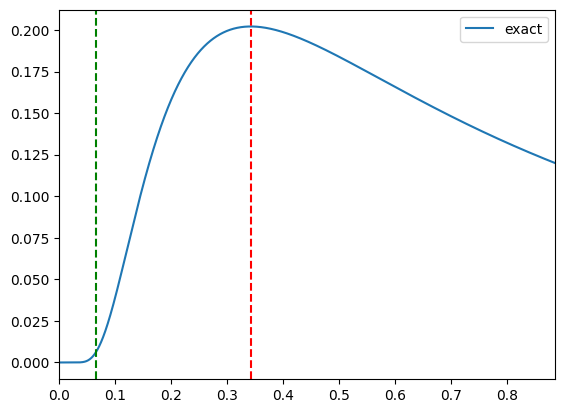

In [305]:
plt.plot(xx, f, label='exact')
# plt.plot(xx, fu, label='approx')

plt.axvline(x0, color='r', ls='--')
plt.axvline(xx[np.argmax(fu)], color='g', ls='--')

plt.xlim(0, delta * 2)
plt.legend()
plt.show()

In [303]:
t0 = (-3/2 + np.sqrt(9/4 + (gamma * delta) ** 2)) / gamma ** 2
t0

0.06513871195364189

In [304]:
t0 = (-3/2 + np.sqrt(9/4 + (delta**2 + (x-mu)**2) * alpha ** 2)) / alpha**2
t0

0.2856050159532921

In [255]:
h = (beta * (x-mu) - 3) / 2
t0 = (-h + np.sqrt(h ** 2 + (delta * omega) ** 2)) / gamma ** 2
t0

10.033589042981617

In [256]:
(-3/2 + np.sqrt(9/4 + (delta ** 2) * (alpha ** 2 + (x-mu)** 2 - 2 * beta ** 2))) / (alpha ** 2 + (x-mu)** 2 - 2 * beta ** 2)

0.06393651666820087